In [1]:
import numpy as np
import swift_scrape
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
import lmfit as lm
import scipy as sp
import corner
import emcee
import math
import pandas as pd
from lc_lmfit import *

In [2]:
folder='afterglow_data/'
filename='_xray_flux.txt'
GRBs=["050724","060614","070714B","150424A","211211A","211227A","061210","071227"]

### Extracting and Plotting Curves


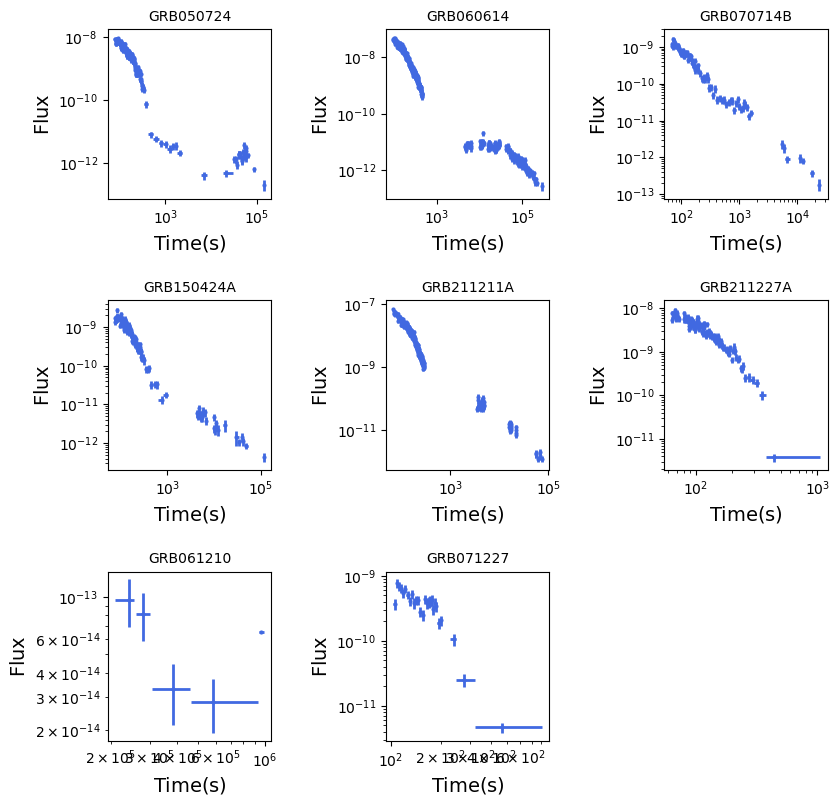

In [4]:
fig=plt.figure(figsize=(8.0,8.0), dpi=100)
fig.patch.set_facecolor('white')
plt.subplots_adjust(top=0.96, bottom=0.07, left=0.07, right=0.97, hspace=0.6,wspace=0.7)

for i in range(len(GRBs)):
    ax1 = fig.add_subplot(3, 3, i+1)
    Time,Time_high,Time_low,Flux,Flux_high,Flux_low=get_individual_curves_log(folder+GRBs[i]+filename)
    ax1.errorbar(Time,Flux,xerr=[Time_low,Time_high],yerr=[Flux_low,Flux_high],fmt='.',color='royalblue',linewidth=2.0,markersize=4.0)
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    #ax1.set_xlim(1e1,1e5)
    #ax1.set_ylim(1e-14,1e-9)
    ax1.set_xlabel('$\mathrm{Time(s)}$',fontsize=14.)
    ax1.set_ylabel('$\mathrm{Flux}$',fontsize=14.)
    ax1.set_title("GRB"+GRBs[i],fontsize=10)

#xticks = ticker.LogLocator(numticks=4)
#ax1.xaxis.set_minor_locator(xticks)
#ax1.tick_params(axis='x', which='minor', labelsize=7.0)

plt.show()

### GRB i=7 EE

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 12
    # data points      = 14
    # variables        = 4
    chi-square         = 7.65436515
    reduced chi-square = 0.76543652
    Akaike info crit   = -0.45293730
    Bayesian info crit = 2.10329201
[[Variables]]
    t_break:    176.156436 +/- 7.11023583 (4.04%) (init = 173)
    alpha_1:   -1.65889272 +/- 2.32035647 (139.87%) (init = -2.9)
    alpha_2:    5.44126458 +/- 0.73957254 (13.59%) (init = 6)
    amplitude:  3.5007e-10 +/- 4.5435e-11 (12.98%) (init = 4e-10)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_break, alpha_2)   = 0.668
    C(t_break, alpha_1)   = 0.333
    C(alpha_1, alpha_2)   = 0.197
    C(t_break, amplitude) = -0.162
    C(alpha_1, amplitude) = -0.161
    C(alpha_2, amplitude) = 0.123


<Figure size 800x800 with 0 Axes>

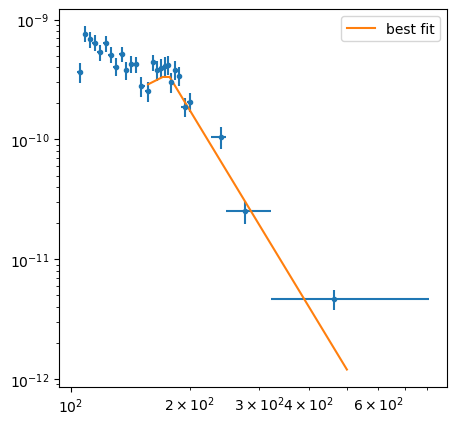

In [82]:
i=7
ax1 = fig.add_subplot(1, 1, 1)
fig=plt.figure(figsize=(8.0,8.0), dpi=100)
fig.patch.set_facecolor('white')
time,time_high,time_low,flux,flux_high,flux_low =get_individual_curves_log(folder+GRBs[i]+filename)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 13
params=lm.Parameters()
params.add("t_break", min = 100, max = 300, value = 173)
params.add("alpha_1", min = -5.0, max = 2.0, value = -2.9)
params.add("alpha_2", min = 3.0, max = 9.0, value = 6)
params.add("amplitude", min = 1e-10, max = 1e-9, value = 4e-10)

minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

x1=np.linspace(time[fit_index],500,50)
fig=plt.figure(figsize=(5.0,5.0), dpi=100)
plt.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
plt.plot(x1,broken_power_law(x1,tb, alp1, alp2, amp),label ='best fit')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

In [83]:
res_refined = lm.minimize(cost_func_bpl, method='emcee', burn=1000, steps=50000,
                            params=bfit, is_weighted=True, args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]),nwalkers = 100)


100%|██████████| 50000/50000 [01:41<00:00, 491.30it/s]


{'t_break': 173.54585619419373,
 'alpha_1': -1.7695494815483803,
 'alpha_2': 5.1310677345716496,
 'amplitude': 3.967466093382419e-10}

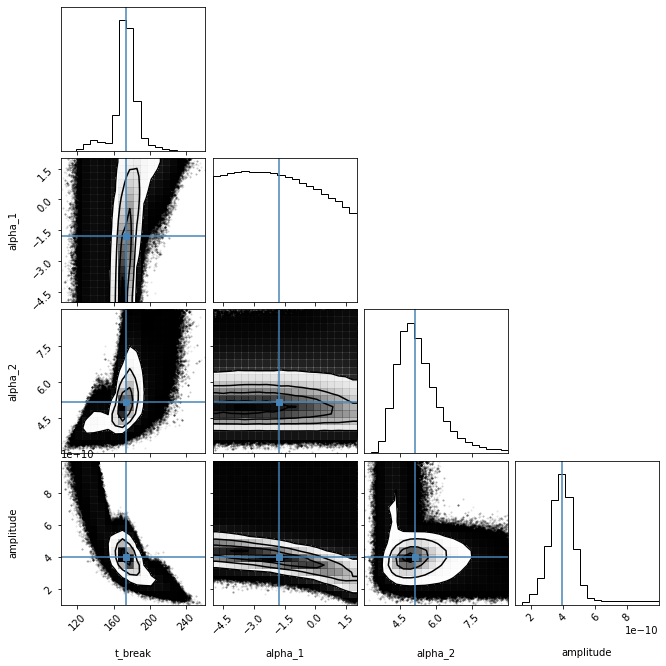

In [84]:
emcee_plot = corner.corner(res_refined.flatchain, labels=res_refined.var_names,
                           truths=list((res_refined.params.valuesdict().values())))

res_refined.params.valuesdict()

### Initial Emission

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 280
    # data points      = 14
    # variables        = 2
    chi-square         = 8.05990215
    reduced chi-square = 0.67165851
    Akaike info crit   = -3.73018278
    Bayesian info crit = -2.45206812
[[Variables]]
    alpha_1:    1.57851156 +/- 0.54482529 (34.52%) (init = 3)
    amplitude:  9.4464e-07 +/- 2.4961e-06 (264.24%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = 1.000


<Figure size 800x800 with 0 Axes>

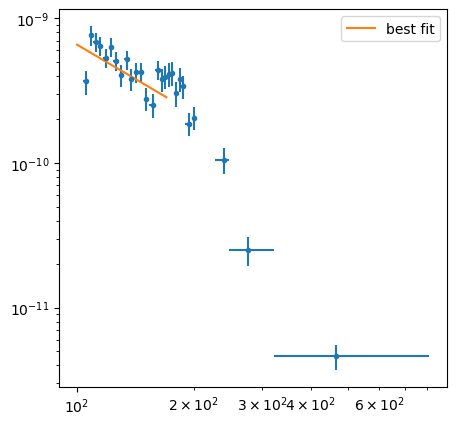

In [157]:
i=7
fig=plt.figure(figsize=(8.0,8.0), dpi=100)
fig.patch.set_facecolor('white')

fit_index = 14
params_ini=lm.Parameters()
params_ini.add("alpha_1", min = 0, max = 10.0, value = 3.0)
params_ini.add("amplitude", min = 1e-7, max = 1e-2, value = 1e-4)

minner_ini = lm.Minimizer(cost_func_pl, params_ini, fcn_args=(time[:fit_index], flux[:fit_index], time_err[:fit_index], flux_err[:fit_index]))
result_ini = minner_ini.minimize(method="nelder")

bfit_ini = result_ini.params
alp1_ini = bfit_ini["alpha_1"].value
amp_ini = bfit_ini["amplitude"].value

lm.printfuncs.report_fit(result_ini)

x1=np.linspace(100,170,30)
fig=plt.figure(figsize=(5.0,5.0), dpi=100)
plt.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
plt.plot(x1,power_law(x1,alp1_ini, amp_ini),label ='best fit')
# plt.errorbar(time[:fit_index], flux[:fit_index], fmt='o')
# plt.plot(x1,power_law(x1, 3, 1e-3),label ='best fit')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

In [158]:
res_refined_ini = lm.minimize(cost_func_pl, method='emcee', burn=1000, steps=50000,
                            params=bfit_ini, is_weighted=True, args=(time[:fit_index], flux[:fit_index], time_err[:fit_index], flux_err[:fit_index]),nwalkers = 100)

100%|██████████| 50000/50000 [01:26<00:00, 578.32it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1000;
tau: [2024.92663988  944.94685866]


{'alpha_1': 3.0917446715407895, 'amplitude': 0.0013566731604755878}

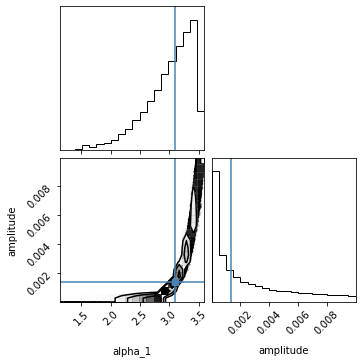

In [159]:
emcee_plot = corner.corner(res_refined_ini.flatchain, labels=res_refined_ini.var_names,
                           truths=list((res_refined_ini.params.valuesdict().values())))

res_refined_ini.params.valuesdict()

### Save Results 

In [161]:
file = open('grb_bpl.txt', 'a')
file.write(str(res_refined.params.valuesdict()))
file.close()

In [169]:

import csv
  
field_names = ['index', 'GRB Name', 't_break', 'alpha_1', 'alpha_2','amplitude']
  
  
with open('grb_bpl.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = field_names)
    writer.writeheader()
    writer.writerow(res_refined.params.valuesdict())

In [183]:
df = pd.read_csv("grb_bpl.csv")
pd_row = res_refined.params.valuesdict()
pd_row["GRB Name"] = GRBs[i]
pd_row["GRB Index"] = i
df.iloc[i] = pd_row
df.to_csv("grb_bpl.csv",index=False)

df2 = pd.read_csv("grb_initial_pl.csv")
pd_row2 = res_refined_ini.params.valuesdict()
pd_row2["GRB Name"] = GRBs[i]
pd_row2["GRB Index"] = i
df2.iloc[i] = pd_row2
df2.to_csv("grb_initial_pl.csv",index=False)

### nbroken law

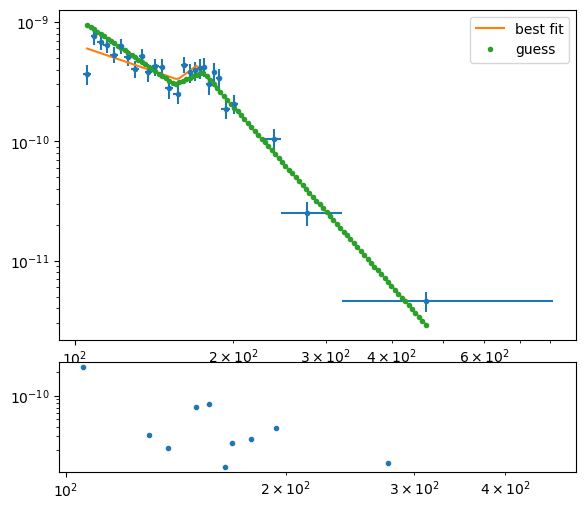

name,value,standard error,relative error,initial value,min,max,vary
tb0,156.820001,15.5319884,(9.90%),155.0,80.0000000,300.000000,True
tb1,170.324967,6.31577647,(3.71%),175.0,90.0000000,400.000000,True
alpha_0,1.50974860,0.49329615,(32.67%),3,0.00000000,10.0000000,True
alpha_1,-3.21122285,7.96414592,(248.01%),-2,-5.00000000,0.00000000,True
alpha_2,4.97358254,0.39262836,(7.89%),5,0.00000000,10.0000000,True
amplitude,3.3012e-10,5.4796e-11,(16.60%),3e-10,5.0000e-11,1.0000e-09,True


In [24]:
i=7
time,time_high,time_low,flux,flux_high,flux_low =get_individual_curves_log(folder+GRBs[i]+filename)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
n=3
params=lm.Parameters()
params.add("tb0", min = 8e1, max = 3e2, value = 1.55e2)
params.add("tb1", min = 9e1, max = 4e2, value = 1.75e2)
params.add("alpha_0", min = 0, max = 10.0, value = 3)
params.add("alpha_1", min = -5.0, max = 0, value = -2)
params.add("alpha_2", min = 0, max = 10.0, value = 5)
params.add("amplitude", min = 5e-11, max = 1e-9, value = 3e-10)

minner = lm.Minimizer(cost_func_nbpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:], n), fcn_kws={"orth":False})
result = minner.minimize(method="least_squares")
# lm.printfuncs.report_fit(result)

residuals = get_y(result, n, time) - flux

x = np.geomspace(time[0],time[-1],100)
fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1])
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, get_y(result, n, x),label ='best fit')
ax1.loglog(x, nbroken_law(x, [1.55e2, 1.75e2], [3, -2, 5], 3e-10),'.',label ='guess')
ax1.legend()
ax2.loglog(time,residuals, '.')
plt.subplots_adjust(hspace=0.1)
plt.show()

result.params